450
(0, 0)


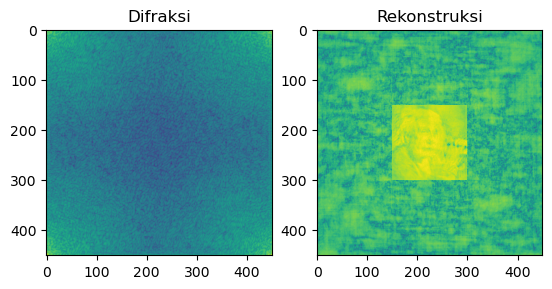

In [17]:
import numpy as np
import numpy.fft as fft
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from math import pi

def hio_reconstruction(data, mask, beta, num_iterations):
    # Inisialisasi objek rekonstruksi acak
    obj = np.random.rand(*data.shape) * np.exp(1j * np.random.uniform(0, 2*np.pi, data.shape))

    # Iterasi HIO
    for i in range(num_iterations):
        # Transformasi Fourier objek
        obj_fourier = np.fft.fftshift(np.fft.fft2(obj))

        # Menerapkan batasan Fourier pada komponen amplitudo
        obj_amplitude = np.abs(obj_fourier)
        obj_amplitude = np.where(mask == 1, obj_amplitude, data)

        # Transformasi balik Fourier
        obj_new = np.fft.ifft2(np.fft.ifftshift(obj_amplitude * np.exp(1j * np.angle(obj_fourier))))

        # Menerapkan batasan domain real pada objek
        obj = np.where(mask == 1, obj_new, obj - beta * obj_new)

    return obj

# Contoh penggunaan
# Data difraksi
source = imread("einstein.bmp")
#plt.figure(num=None, figsize=(8,6), dpi=80)

pad_len = len(source)
padded = np.pad(source, ((pad_len, pad_len),(pad_len, pad_len)), 'constant', 
                constant_values=((0,0),(0,0)))


ft = np.fft.fft2(padded)

diffract = np.abs(ft)

lenpadded = len(padded)
print(lenpadded)
print(np.unravel_index(np.argmax(diffract),diffract.shape))

# Mask yang menentukan wilayah batasan Fourier
mask = np.ones((pad_len+2,pad_len+2))
mask = np.pad(mask, ((pad_len-1, pad_len-1),(pad_len-1, pad_len-1)), 'constant', 
                constant_values=((0,0),(0,0)))

# Parameter HIO
beta = 0.8
num_iterations = 801

# Rekonstruksi menggunakan HIO
reconstructed_obj = hio_reconstruction(diffract, mask, beta, num_iterations)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(ft)))
plt.title('Difraksi')
plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(reconstructed_obj)))
plt.title('Rekonstruksi')
plt.show()